# Reading Input

In [14]:
import pandas as pd
from proj_utils.input_interpreter import format_input

In [15]:
customer_df = pd.read_excel('data/2_detail_table_customers.xls')
deposit_df = pd.read_excel('data/4_detail_table_depots.xls')
routes = customer_df['ROUTE_ID'].unique()

In [1]:
from proj_utils.fake_input_generator import generator
from proj_utils.input_interpreter import format_input

import matplotlib.pyplot as plt

from VRP.greedy_solutions import nearest_neighbour_solution, random_solution
from VRP.modify_solution import combined_rand_modification
from VRP.verify_solution import valid_path, calculate_path_distance, num_vehicles

from proj_utils.path import print_path

from solver_step import SolverStep

# Simulated Annealing Solution

In [12]:
import simulated_annealing.solver as SA # Simulated anealing solver

In [16]:
route_id = routes[0]
dists, demand, points = format_input(route_id,customer_df,deposit_df)
truck_volume_capacity = 20
truck_weight_capacity = 30000
truck_capacity = (truck_weight_capacity,truck_volume_capacity)
print(route_id)
print(len(points))

#dists, demand, points = generator(20)

2946091
108


In [17]:

eval_function = lambda x: 0.3*num_vehicles(x)+calculate_path_distance(x, dists) if(valid_path(x,truck_capacity,demand)) else float('inf')
solver_step = SA.generic_solver_factory(
    lambda x: combined_rand_modification(x, len(points),dists),
    eval_function,
    )

In [18]:
init_state = random_solution(dists, demand, truck_capacity)
init_step = SolverStep(init_state, eval_function(init_state),1000)

In [19]:
x = []
res = []
c_step = init_step
for i in range(1000):
    x.append(i)
    res.append(c_step.get_best_sol_value())
    
    c_step = solver_step(c_step)

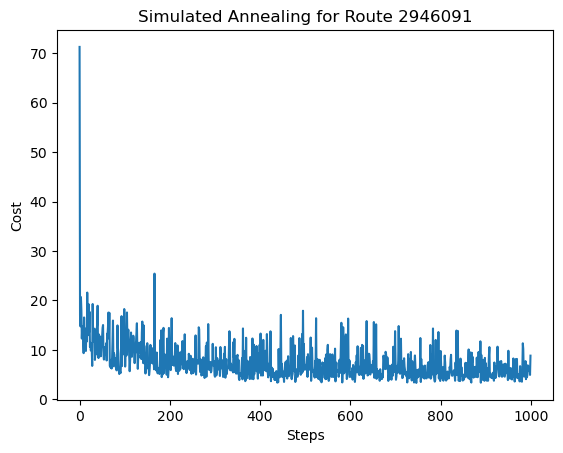

In [20]:
plt.plot(x,res)
plt.xlabel("Steps")
plt.ylabel("Cost")
plt.title(f"Simulated Annealing for Route {route_id}")
plt.savefig(f"Simulated Annealing for Route {route_id}")
plt.show()

In [22]:
print(res[-1])

8.846484168921263


# Taboo Search

In [ ]:
import taboo_search.solver as TS

In [ ]:
route_id = routes[1]
dists, demand, points = format_input(route_id,customer_df,deposit_df)
truck_volume_capacity = 20
truck_weight_capacity = 30000
truck_capacity = (truck_weight_capacity,truck_volume_capacity)

#dists, demand, points = generator(20)

In [ ]:
taboo_list_size = 10
solver_step = TS.taboo_search_solver_factory(
    lambda x: combined_rand_modification(x, len(points),dists),
    lambda x: calculate_path_distance(x, dists) if(valid_path(x,(30,20),demand)) else float('inf'),
    taboo_list_size
    )

In [ ]:
init_state = nearest_neighbour_solution(dists, demand, truck_capacity)
init_step = SolverStep(init_state, eval_function(init_state),1000)

In [ ]:
x = []
res = []
c_step = init_step
for i in range(1000):
    x.append(i)
    res.append(c_step.get_best_sol_value())
    
    c_step = solver_step(c_step)

In [ ]:
plt.plot(x,res)
plt.xlabel("Steps")
plt.ylabel("Cost")
plt.title(f"Tabouu Search for Route {route_id}")
plt.show()

In [ ]:
print(res[-1])

# Q-learning

In [23]:
from VRP.greedy_solutions import nearest_neighbour_solution
from VRP.modify_solution import *
from q_learning import *

from proj_utils.fake_input_generator import generator

capacity = (10,4)

dists, demand, points = generator(20)
path = nearest_neighbour_solution(dists, demand, (30,5))

function_list = [
    lambda x:intra_route_swap(x,len(dists),dists),
    lambda x:inter_route_swap(x,len(dists),dists),
    lambda x:intra_route_shift(x,len(dists),dists),
    lambda x:inter_route_shift(x,len(dists),dists),
    lambda x:two_intra_route_shift(x,len(dists),dists),
    lambda x:two_intra_route_swap(x,len(dists),dists),
    lambda x:remove_smallest_route(x,len(dists),dists),
    lambda x:remove_random_route(x,len(dists),dists),
    lambda x:split_biggest_route(x,len(dists),dists),
    lambda x:split_random_route(x,len(dists),dists)
    ]

q = q_learning_obj(0,init_q_learning_table(len(function_list)),len(function_list), 0.9, 0.1)
eval_function = lambda x: calculate_path_distance(x, dists) if(valid_path(x,capacity,demand)) else float('inf')

In [24]:
import taboo_search.solver as TS
taboo_list_size = 10
solver_step = TS.taboo_search_solver_factory(
    lambda x: q_learning_iteration(x,q,function_list,eval_function),
    eval_function,
    taboo_list_size
    )

[0, 1, 18, 10, 14, 0, 2, 7, 5, 4, 0, 6, 11, 19, 9, 0, 12, 3, 17, 13, 0, 15, 8, 16, 0]
[0, 18, 1, 16, 14, 0, 11, 6, 2, 7, 0, 4, 5, 0, 12, 9, 19, 0, 17, 13, 3, 0, 10, 8, 15, 0]


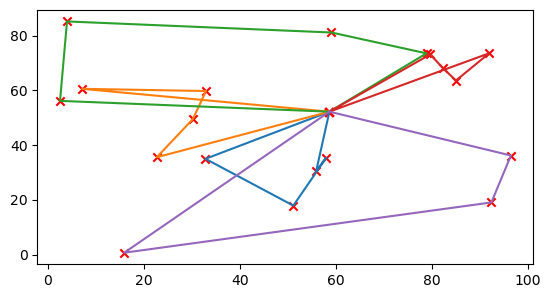

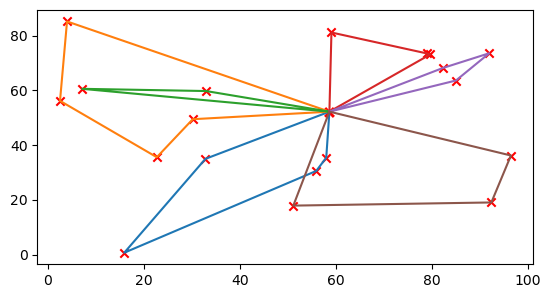

In [25]:
from solver_step import SolverStep
init_state = nearest_neighbour_solution(dists, demand, capacity)
init_step = SolverStep(init_state, eval_function(init_state),200)
print(init_state)
step_1 = solver_step(init_step)

print(step_1.get_best_sol())
print_path(points, init_step.get_best_sol())
print_path(points, step_1.get_best_sol())